In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import pandas as pd

df = pd.read_csv("trip_request.csv")

df['CreatedDate'] = pd.to_datetime(df['CreatedDate'])

completed_trips = df[df['Status'] == 'Completed']
cancelled_trips = df[df['Status'].str.contains('Cancelled', case=False, na=False)]

trips_per_day = df.resample('D', on='CreatedDate').size()
completed_trips_per_day = completed_trips.resample('D', on='CreatedDate').size()
cancelled_trips_per_day = cancelled_trips.resample('D', on='CreatedDate').size()

summary_df = pd.DataFrame({
    'Completed Trips': completed_trips_per_day.values
})

summary_df.to_csv("complete.csv", index=False)

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')
from sklearn import linear_model, datasets

comp = pd.read_csv("complete.csv")

/tmp/ipykernel_21445/2287883125.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [21]:

# Split the independent data into training/testing sets
comp_x_train = comp[:int(len(comp)*0.75)]
comp_x_test = comp[int(len(comp)*0.25):]
comp_x_test[:2]

,Completed Trips
90,156
91,125


In [22]:
comp_y_train = comp[:int(len(comp)*0.75)]
comp_y_test = comp[int(len(comp)*0.25):]

comp_y_test

,Completed Trips
90,156
91,125
92,102
93,120
94,125
...,...
356,0
357,78
358,120
359,124


In [23]:
regr = linear_model.LinearRegression()

regr.fit(comp_y_train, comp_x_train)

LinearRegression()

In [24]:
# Mean squared error
print('Mean squared error: %2f' %
      np.mean((regr.predict(comp_x_test)-comp_y_test)**2))

Mean squared error: 0.000000


Variance score: 1.000000


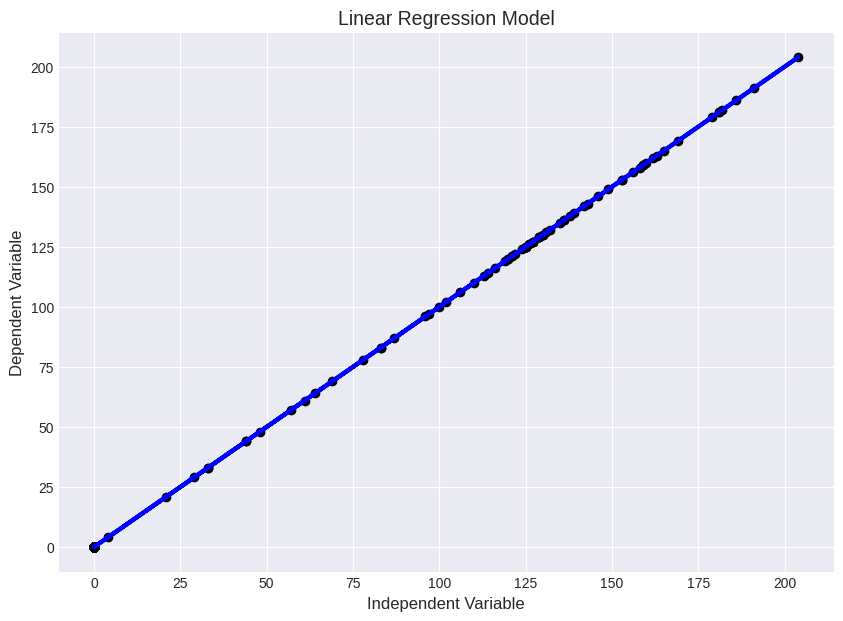

In [25]:
# Calculate variance score
print('Variance score: %2f' % regr.score(comp_x_test, comp_y_test))

# Plot outputs
plt.figure(figsize=(10, 7))
plt.scatter(comp_x_test, comp_y_test, color='black')
plt.plot(comp_x_test, regr.predict(
    comp_x_test), color='blue', linewidth=3)
plt.title('Linear Regression Model', fontsize=14)
plt.xlabel('Independent Variable', fontsize=12)
plt.ylabel('Dependent Variable', fontsize=12)
plt.show()

[ 8.5 10.1]
